In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [368]:
ATTACK="UAP"
BASE_MODEL="ResNet152" # AlexNet, VGG16, VGG19, ResNet18, ResNet152

In [369]:
with open(f"Results/{ATTACK}.json", "r") as f:
    results = json.load(f)

In [370]:
entries = [entry for entry in results if entry["model"] == BASE_MODEL]

In [371]:
delta = [entry["delta"] for entry in entries]
fid_scores = np.array([entry["fid_score"] for entry in entries])
lpips_scores = np.array([entry["lpips_score"] for entry in entries])
fooling_rates = np.array([entry["fooling_rate"] for entry in entries])

In [372]:
fid_min, fid_max = fid_scores.min(), fid_scores.max()
fid_scores_normalized = (fid_scores - fid_min) / (fid_max - fid_min) if fid_max != fid_min else fid_scores

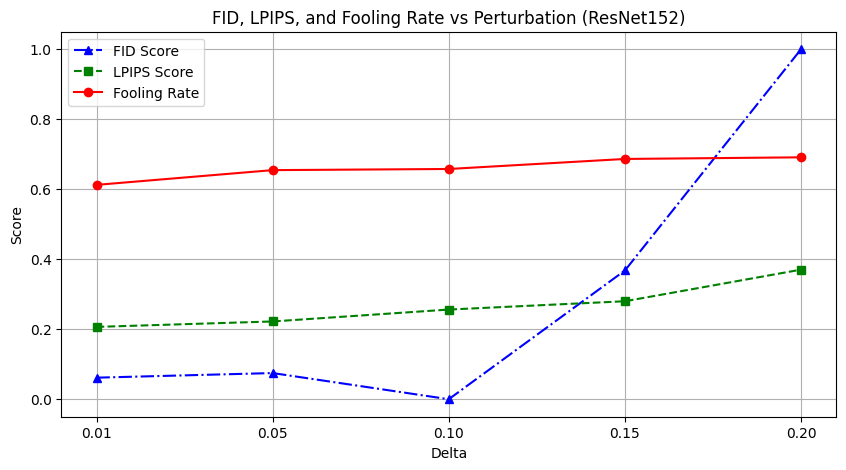

In [373]:
plt.figure(figsize=(10, 5))

plt.plot(delta, fid_scores_normalized, marker='^', linestyle='-.', label="FID Score", color='blue')
plt.plot(delta, lpips_scores, marker='s', linestyle='--', label="LPIPS Score", color='green')
plt.plot(delta, fooling_rates, marker='o', linestyle='-', label="Fooling Rate", color='red')

plt.xlabel("Delta")
plt.ylabel("Score")
plt.title(f"FID, LPIPS, and Fooling Rate vs Perturbation ({BASE_MODEL})")
plt.legend()
plt.grid(True)
plt.savefig(f"Plots/Results-{ATTACK}-{BASE_MODEL}.png")
plt.show()